In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [2]:
import librosa
import PIL.Image as pimg
from pydub import AudioSegment

In [3]:
from audio_utils import *

In [4]:
import cv2

In [5]:
datadir='data/input_from_sspf/' 

In [6]:
audio_path = os.path.join(datadir, 'cough')

In [7]:
audio_path

'data/input_from_sspf/cough'

In [73]:
sample_rate = 4410

In [74]:
x,sr = librosa.load(path=os.path.join(audio_path, '-5dCv5_nvU8_00012_nohash_15.wav'), sr=sample_rate)

In [75]:
x

array([ 2.7086398e-05,  3.0908875e-05, -5.3097850e-05, ...,
        1.9689836e-04, -4.6079178e-05, -2.4418879e-04], dtype=float32)

In [76]:
x.shape

(4410,)

In [32]:
x_freq = librosa.stft(y=x, n_fft=512)

In [33]:
xdb = librosa.amplitude_to_db(abs(x_freq))

In [34]:
xdb.shape

(257, 173)

In [37]:
audio = os.path.join(audio_path, '-5dCv5_nvU8_00012_nohash_15.wav')

In [59]:
# same as above, just changed the y_axis from hz to log in the display func    
def convert_audio_to_spectogram_log2(filename: str, sample_rate: int, fft_number: int):
    x, sr = librosa.load(filename, sr=sample_rate)
    X = librosa.stft(y=x, n_fft=fft_number)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 5))
    p = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    return Xdb, p

In [63]:
# same as above, just changed the y_axis from hz to log in the display func    
def convert_audio_to_spectogram_log3(filename: str, sample_rate: int, fft_number: int):
    x, sr = librosa.load(filename, sr=sample_rate)
    X = librosa.stft(y=x, n_fft=fft_number)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 5))
    p = librosa.display.specshow(Xdb, sr=sr)
    return Xdb, p

In [131]:
sample_rate = 2205

In [132]:
x, sr = librosa.load(audio, sr=sample_rate)

In [137]:
# X = librosa.feature.melspectrogram(y=x, sr=sample_rate, n_fft=256)
X = librosa.stft(y=x, n_fft=128)

In [138]:
Xdb = librosa.amplitude_to_db(abs(X))

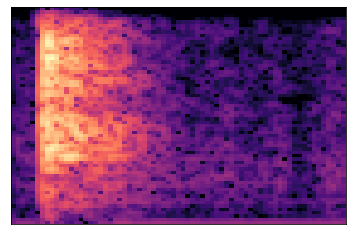

In [139]:
p = librosa.display.specshow(Xdb, sr=sr)

In [140]:
Xdb.shape

(65, 69)

In [141]:
hoge = Xdb.flatten()

In [142]:
hoge.shape

(4485,)

In [104]:
p

In [105]:
from PIL import Image as im

In [50]:
# creating image object of
# above array
data = im.fromarray(Xdb)

In [47]:
sift = cv2.SIFT_create()

In [52]:
keypoints, descriptors = sift.detectAndCompute(Xdb, None)
img_sift = cv2.drawKeypoints(img, keypoints, None, flags=4)

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/features2d/src/sift.dispatch.cpp:477: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'


In [ ]:
from PIL import Image as im